In [17]:
# install tensorflow
%pip install tensorflow -q

In [18]:
# import necessary libraries and modules
from tensorflow import keras
from sklearn.linear_model import Perceptron


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [19]:
 # normalize the pixel values of traning and test images
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test/ 255.0

<Figure size 640x480 with 0 Axes>

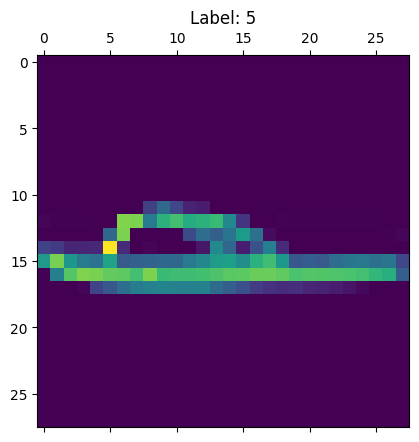

<Figure size 640x480 with 0 Axes>

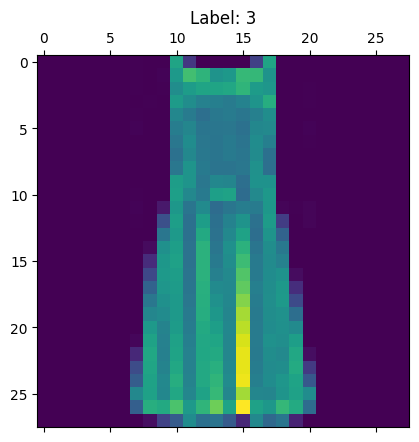

<Figure size 640x480 with 0 Axes>

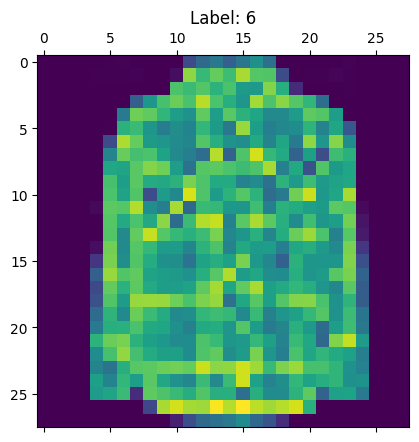

<Figure size 640x480 with 0 Axes>

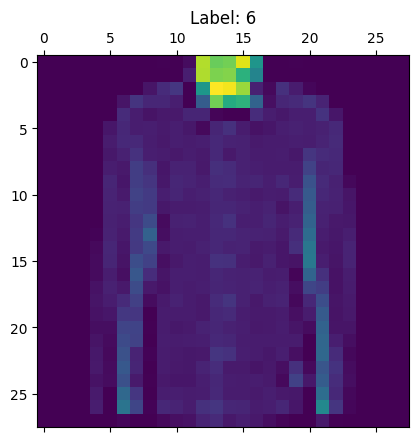

<Figure size 640x480 with 0 Axes>

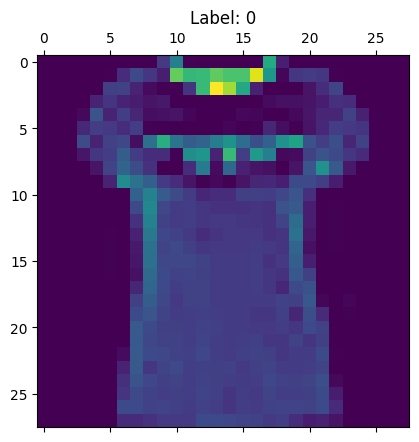

In [20]:
# loop through the range of 5 images in the training datasets
for i in range(30, 35):
    plt.figure()
    plt.matshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")

In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

perceptron = Perceptron()
perceptron.fit(x_train_flat, y_train)

print(f"Training data score: {perceptron.score(x_train_flat, y_train)}")
print(f"Test data score: {perceptron.score(x_test_flat, y_test)}")

Training data score: 0.8051166666666667
Test data score: 0.7834


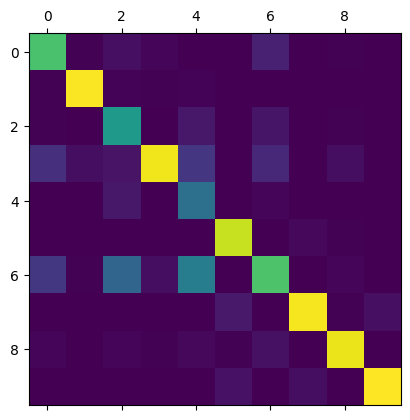

In [21]:
plt.matshow(confusion_matrix(perceptron.predict(x_test_flat), y_test))

In [22]:
model = keras.models.Sequential([
  keras.layers.Dense(10, activation='softmax')

])

# loss function
LOSS_FN = keras.losses.sparse_categorical_crossentropy

# compile the model
model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

# train the model
model.fit(x_train_flat, y_train, epochs=6, validation_data=(x_test_flat, y_test))

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7365 - loss: 0.7940 - val_accuracy: 0.8234 - val_loss: 0.5129
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8412 - loss: 0.4690 - val_accuracy: 0.8300 - val_loss: 0.4886
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8455 - loss: 0.4446 - val_accuracy: 0.8383 - val_loss: 0.4688
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8529 - loss: 0.4220 - val_accuracy: 0.8388 - val_loss: 0.4601
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8573 - loss: 0.4119 - val_accuracy: 0.8334 - val_loss: 0.4752
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8590 - loss: 0.4104 - val_accuracy: 0.8440 - val_loss: 0.4447


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


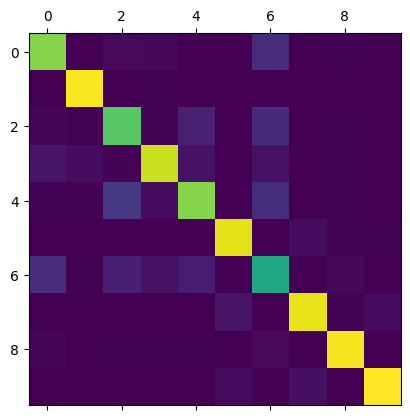

In [23]:
plt.matshow(confusion_matrix(model.predict(x_test_flat).argmax(axis=1), y_test))

In [31]:
modelNames = [
  '1d',
  '2d',
  '3d',
  '1c1d',
  '1c2d',
  '2c2d',
  '2c3d'
]

NODES_PER_HIDDEN_LAYER = 64

In [33]:



models = [keras.models.Sequential(
    [keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
]),

# 1 hidden layer
keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
]),

# 2 hidden layers
keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
]),

#1 convolutional layer
keras.models.Sequential([
  keras.Input(shape=(28, 28, 1)),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation='softmax')
]),

#1 convolutional layer and 1 hidden layer
keras.models.Sequential([
  keras.Input(shape=(28, 28, 1)),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
]),

#2 convolutional layers and 2 hidden layers
keras.models.Sequential([
  keras.Input(shape=(28, 28, 1)),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
]),

#2 convolutional layers and 3 hidden layers
keras.models.Sequential([
  keras.Input(shape=(28, 28, 1)),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(10, activation='softmax')

])
]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
#compile all models
for model in models:
  model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

In [35]:
TRAINING_EPOCHS = 6

#train all models
for model, name in zip(models, modelNames):
  print(f"Training {name}...")
  model.fit(x_train, y_train, epochs=TRAINING_EPOCHS, validation_data=(x_test, y_test))

Training 1d...
Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7345 - loss: 0.7889 - val_accuracy: 0.8185 - val_loss: 0.5221
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8395 - loss: 0.4677 - val_accuracy: 0.8355 - val_loss: 0.4754
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8511 - loss: 0.4360 - val_accuracy: 0.8412 - val_loss: 0.4567
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8537 - loss: 0.4236 - val_accuracy: 0.8417 - val_loss: 0.4524
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8544 - loss: 0.4217 - val_accuracy: 0.8414 - val_loss: 0.4635
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8606 - loss: 0.4055 - val_accuracy: 0.8446 - val_loss: 0.4509
Training 2d...
Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7708 - loss: 0.6741 - val_accuracy: 0.8377 - val_loss: 0.4536
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.

In [37]:
# get all model accuracy sc ores on test data
scores = [model.evaluate(x_test, y_test)[1] for model in models]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8492 - loss: 0.4397
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8736 - loss: 0.3457
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8733 - loss: 0.3473
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9035 - loss: 0.3011
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9060 - loss: 0.3424
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9119 - loss: 0.3618
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9139 - loss: 0.3071


In [38]:
modelNames.insert(0, "Perceptron")
scores.insert(0, perceptron.score(x_test_flat, y_test))

for name, score in zip(modelNames, scores):
  print(f"{name}: {score}")

Perceptron: 0.7834
1d: 0.8446000218391418
2d: 0.8723000288009644
3d: 0.8761000037193298
1c1d: 0.9028000235557556
1c2d: 0.9071999788284302
2c2d: 0.9144999980926514
2c3d: 0.9136999845504761


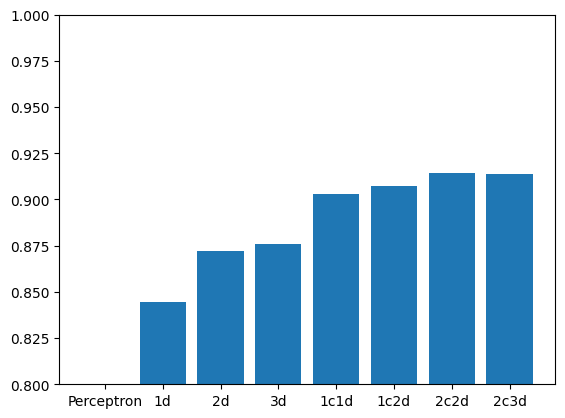

In [39]:
plt.bar(modelNames, scores)
plt.ylim(0.8, 1.0)
plt.show()